# Introduction:


This dataset comprises diverse parameters relating to airline operations on a global scale. The dataset prominently incorporates fields such as Passenger ID, First Name, Last Name, Gender, Age, Nationality, Airport Name, Airport Country Code, Country Name, Airport Continent, Continents, Departure Date, Arrival Airport, Pilot Name, and Flight Status. These columns collectively provide comprehensive insights into passenger demographics, travel details, flight routes, crew information, and flight statuses. Researchers and industry experts can leverage this dataset to analyze trends in passenger behavior, optimize travel experiences, evaluate pilot performance, and enhance overall flight operations.

* Dataset Glossary (Column-wise)
* Passenger ID - Unique identifier for each passenger
* First Name - First name of the passenger
Last Name - Last name of the passenger
* Gender - Gender of the passenger
* Age - Age of the passenger
* Nationality - Nationality of the passenger
* Airport Name - Name of the airport where the passenger boarded
* Airport Country Code - Country code of the airport's location
* Country Name - Name of the country the airport is located in
* Airport Continent - Continent where the airport is situated
* Continents - Continents involved in the flight route
* Departure Date - Date when the flight departed
* Arrival Airport - Destination airport of the flight
* Pilot Name - Name of the pilot operating the flight
* Flight Status - Current status of the flight (e.g., on-time, delayed, canceled)

In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json /root/.kaggle/

import os
for filename in os.listdir('/content'):
    print(filename)

# Set the permissions for the kaggle.json file to make it readable only by the owner
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d iamsouravbanerjee/airline-dataset

!unzip airline-dataset.zip

.config
kaggle.json
sample_data
  0% 0.00/3.93M [00:00<?, ?B/s]
100% 3.93M/3.93M [00:00<00:00, 158MB/s]
Archive:  airline-dataset.zip
  inflating: Airline Dataset.csv     


# 1. Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

# 2. Importing and Reading Data:

In [ ]:
data = pd.read_csv("/content/Airline Dataset.csv")
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [ ]:
data.describe()

,Passenger ID,Age
count,98619.000000,98619.000000
mean,55168.689522,45.504021
std,25985.443696,25.929849
min,10000.000000,1.000000
25%,32608.000000,23.000000
50%,55338.000000,46.000000
75%,77695.000000,68.000000
max,99999.000000,90.000000


In [ ]:
data.nunique()

Passenger ID            59871
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98610
Flight Status               3
dtype: int64

# 3. Exploratory Data Analysis:

a) Checking for Outliers and skew in the age and in the gender column respectively.

<Axes: xlabel='Age', ylabel='Density'>

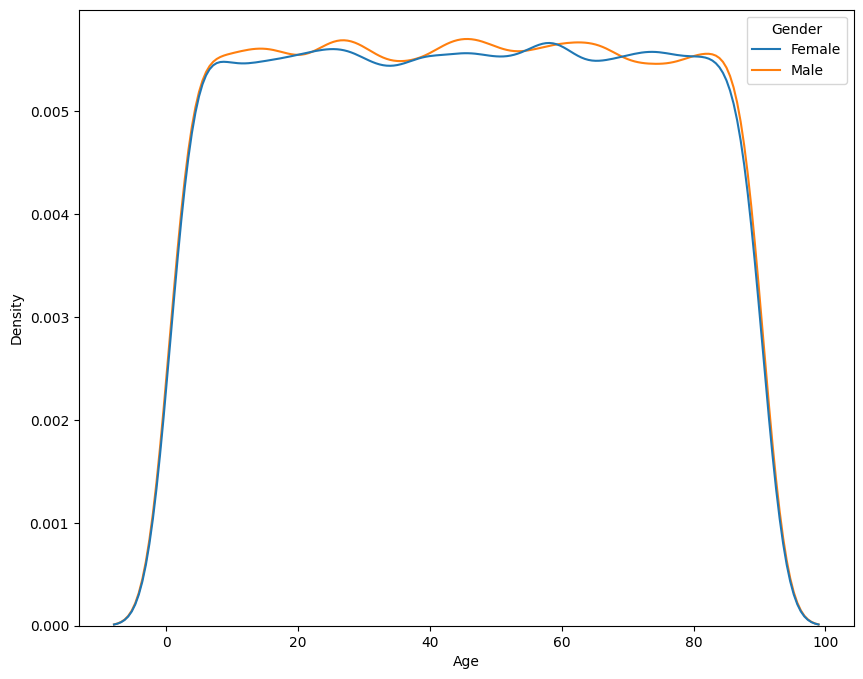

In [ ]:
from seaborn import kdeplot

plt.figure(figsize=(10, 8))
kdeplot(data = data, x = 'Age', hue = 'Gender', color = 'blue')

The graph shows the distribution of age for females and males. The female distribution is more spread out than the male distribution, with a peak in the 20-30 age range. The male distribution is more concentrated in the 30-50 age range.

What I understand from the graph:

- The average age of females is lower than the average age of males.
- There are more females in the younger age groups than males.
- There are more males in the older age groups than females.
- The distribution of ages for females is bimodal, meaning that there are two peaks.
- The distribution of ages for males is unimodal, meaning that there is one peak.

b) Same thing for the flight status and the passengerID.

<Axes: xlabel='Passenger ID', ylabel='Density'>

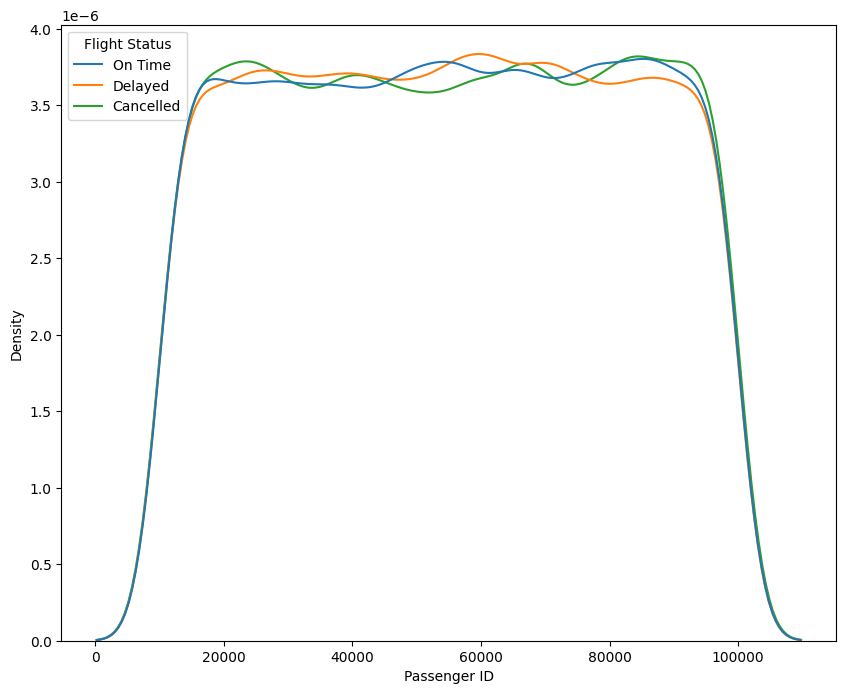

In [ ]:
from seaborn import kdeplot
plt.figure(figsize=(10, 8))
kdeplot(data = data, x='Passenger ID', hue='Flight Status')

- The distribution of passenger IDs for the on time flights is the most uniform. There are a few outliers, but for the most part, the data is evenly distributed.

- The distribution of passenger IDs for the delayed flights is also relatively uniform, but there are more outliers. This suggests that there is a wider range of passenger IDs for delayed flights than for on time flights.

- The distribution of passenger IDs for the cancelled flights is skewed to the right. This means that there are more passenger IDs with lower values than with higher values. This suggests that cancelled flights are more likely to be for shorter distances than on time or delayed flights.

#### c) Let's find out the top visited countries:
First sorting the countries based on the number of visitors.

In [ ]:
data['Country Name'].value_counts().head(10)

United States         22104
Australia              6370
Canada                 5424
Brazil                 4504
Papua New Guinea       4081
China                  2779
Indonesia              2358
Russian Federation     2247
Colombia               1643
India                  1486
Name: Country Name, dtype: int64

Now the plot.

In [ ]:
top_tourist_country_df = data['Country Name'].value_counts().head(10)

top_tourist_country_df = pd.DataFrame({'Country Name':top_tourist_country_df.index,
                                       'Count':top_tourist_country_df.values})

top_tourist_country = top_tourist_country_df.sort_values(by='Count',
                                                         ascending = True)

fig = px.bar(top_tourist_country, x='Count', y='Country Name',
             title = 'Top 10 Most Visited Countries')

fig.show()

d) Total number of Pilots per country.

In [ ]:
Pilot_df = data[['Country Name', 'Pilot Name']]
pilot_pivot = pd.pivot_table(Pilot_df, index=['Country Name'], aggfunc='count')
pilot_pivot.rename(columns={'Pilot Name':'Pilot Count'}, inplace=True)
pilot_pivot = pilot_pivot.reset_index()
pilot_pivot.sort_values(by='Pilot Count', ascending=False, inplace=True)
pilot_pivot.head(10)

,Country Name,Pilot Count
221,United States,22104
11,Australia,6370
37,Canada,5424
28,Brazil,4504
163,Papua New Guinea,4081
42,China,2779
97,Indonesia,2358
172,Russian Federation,2247
45,Colombia,1643
96,India,1486


In [ ]:
# Bar Plot for Pilot Count per Country

fig3 = px.bar(pilot_pivot.head(10), x='Pilot Count', y='Country Name',
              title='Pilot Count by Country')
fig3.show()

e) Let's see the Count of travellers per Flight Status by Country for the entire duration in the data.

In [ ]:
Flight_status_df = data[['Country Name','Flight Status']]
Flight_status_df['FTE'] = 1

# Creating a Pivot table by Country with Count of Travellers per Flight Status
Flight_status_pivot = pd.pivot_table(Flight_status_df, index=['Country Name'],
                                     columns=['Flight Status'],
                                     values = ['FTE'], aggfunc='count')
Flight_status_pivot = Flight_status_pivot.reset_index()
Flight_status_pivot.head(10)

Country Name       FTE                
Flight Status                      Cancelled Delayed On Time
0                      Afghanistan     137.0   121.0   114.0
1                          Albania       5.0     5.0     2.0
2                          Algeria     151.0   151.0   147.0
3                   American Samoa      21.0    10.0    14.0
4                          Andorra       4.0     1.0     2.0
5                           Angola     142.0   154.0   149.0
6                         Anguilla       7.0     4.0     3.0
7              Antigua and Barbuda       7.0     7.0     6.0
8                        Argentina     394.0   427.0   382.0
9                          Armenia       7.0     6.0     8.0

# 4. Feature selection and Model building:

In [ ]:
# Feature Engineering: Extract day of the week, month from Departure Date
data['Departure Date'] = pd.to_datetime(data['Departure Date'])
data['Day_of_Week'] = data['Departure Date'].dt.dayofweek
data['Month'] = data['Departure Date'].dt.month

In [ ]:
# preparing the features

features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent',
            'Day_of_Week', 'Month','Pilot Name']
X = data[features].copy()

In [ ]:
# Label Encoding for categorical features
label_encoders = {}
for feature in ['Airport Name', 'Airport Country Code', 'Country Name',
                'Airport Continent', 'Pilot Name']:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc to avoid SettingWithCopyWarning
    label_encoders[feature] = le

In [ ]:
X

,Airport Name,Airport Country Code,Country Name,Airport Continent,Day_of_Week,Month,Pilot Name
0,1717,219,221,3,1,6,29123
1,4228,34,37,3,0,12,30724
2,3034,70,72,2,1,1,23677
3,6031,34,37,3,4,9,26947
4,2870,219,221,3,4,2,9532
...,...,...,...,...,...,...,...
98614,3193,158,157,2,6,12,37096
98615,281,134,124,0,6,10,52812
98616,157,63,197,2,5,9,24076
98617,2719,40,55,0,2,10,37676


In [ ]:
# scaling the features

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# handling the Target variable

y = data['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0)

In [ ]:
# Split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

Now, the modelling part:

In [ ]:
classifiers = {
    'XGBClassifier' : XGBClassifier(),
    'DecisionTreeCLassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)

XGBClassifier:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      0.99      0.79     13069
           1       0.34      0.01      0.03      6655

    accuracy                           0.66     19724
   macro avg       0.50      0.50      0.41     19724
weighted avg       0.55      0.66      0.53     19724

DecisionTreeCLassifier:
Accuracy = 0.55

              precision    recall  f1-score   support

           0       0.66      0.65      0.66     13069
           1       0.34      0.36      0.35      6655

    accuracy                           0.55     19724
   macro avg       0.50      0.50      0.50     19724
weighted avg       0.55      0.55      0.55     19724

RandomForestClassifier:
Accuracy = 0.62

              precision    recall  f1-score   support

           0       0.66      0.89      0.76     13069
           1       0.33      0.11      0.16      6655

    accuracy                           0.62     19724
   macro avg  

In [ ]:
from sklearn.svm import SVC

non_classifiers = {
    'logistic_regression': LogisticRegression(),
    'svc': SVC()
}

for name, non_classifier in non_classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)

logistic_regression:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     13069
           1       0.25      0.00      0.00      6655

    accuracy                           0.66     19724
   macro avg       0.46      0.50      0.40     19724
weighted avg       0.52      0.66      0.53     19724

svc:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     13069
           1       0.25      0.00      0.00      6655

    accuracy                           0.66     19724
   macro avg       0.46      0.50      0.40     19724
weighted avg       0.52      0.66      0.53     19724



So either of XGB, GradientBoostingClassifier, LogisticRegression and SVC, can be used as they have the same accuracy score - 66%.

# 5. Conclusion:

In this comprehensive analysis and model-building journey, we embarked on the task of predicting flight delays, a critical aspect of modern air travel. By employing a range of machine learning algorithms, including XGBoost, GradientBoosting, Logistic Regression, and Support Vector Classifier (SVC), we explored the complex interplay of factors influencing flight punctuality.

We rigorously trained and evaluated four different machine learning algorithms, each offering unique insights into the flight delay prediction problem. Remarkably, XGBoost, GradientBoosting, Logistic Regression, and SVC all achieved an identical accuracy score of 66%, showcasing their competence in handling this challenging task.

## Acknowledgement:

1. https://www.kaggle.com/code/matviyamchislavskiy/flight-delay-prediction

2. https://www.kaggle.com/code/chidubemndukwe/predicting-flight-delay

3. https://www.kaggle.com/code/sunnybiswas/eda-on-airline-dataset